In [117]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-prediction/heart.csv


In [118]:
df=pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')

In [119]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [120]:
df.shape

(918, 12)

In [121]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [123]:
data_col=[]
for i,j in df.dtypes.items():
    if j=='int64'or j=='float64':
        pass
    else:
        data_col.append(i)
data_col

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [124]:
data_col=np.array(data_col)
data_col

array(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'],
      dtype='<U14')

In [125]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [126]:
df.sample(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
694,56,M,ATA,120,236,0,Normal,178,N,0.8,Up,0
657,44,M,NAP,130,233,0,Normal,179,Y,0.4,Up,0
223,33,M,NAP,120,298,0,Normal,185,N,0.0,Up,0
581,48,M,ASY,140,208,0,Normal,159,Y,1.5,Up,1
276,51,M,NAP,135,160,0,Normal,150,N,2.0,Flat,1


In [127]:
df[['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']].value_counts()

Sex  ChestPainType  RestingECG  ExerciseAngina  ST_Slope
M    ASY            Normal      Y               Flat        109
     ATA            Normal      N               Up           64
     ASY            Normal      N               Flat         55
                    ST          Y               Flat         49
     NAP            Normal      N               Up           46
                                                           ... 
F    NAP            ST          Y               Flat          1
     TA             LVH         N               Up            1
                    Normal      N               Down          1
M    ATA            LVH         Y               Flat          1
     TA             ST          Y               Flat          1
Name: count, Length: 95, dtype: int64

In [128]:
df.ExerciseAngina.unique()


array(['N', 'Y'], dtype=object)

In [129]:
df.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


In [130]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for i in data_col:
    df[i] = label_encoder.fit_transform(df[i])


In [131]:
df.sample()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
916,57,0,1,130,236,0,0,174,0,0.0,1,1


# **feature selection**

In [132]:
'''
FEATURE SELECTION : DROPPING CONSTANTS
'''

### It will zero variance features
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0.37)
var_thres.fit(df)
kd=df.columns[var_thres.get_support()]

print(var_thres.get_support())
print('\n MOst important columns:> ',df.columns[var_thres.get_support()])
drop_const=[]
for i in df.columns:
    if i not in kd:
        print('column is not more important > ',i)
        drop_const.append(i)

[ True False  True  True  True False  True  True False  True False False]

 MOst important columns:>  Index(['Age', 'ChestPainType', 'RestingBP', 'Cholesterol', 'RestingECG',
       'MaxHR', 'Oldpeak'],
      dtype='object')
column is not more important >  Sex
column is not more important >  FastingBS
column is not more important >  ExerciseAngina
column is not more important >  ST_Slope
column is not more important >  HeartDisease


In [133]:
thr=VarianceThreshold(threshold=0.26)
thr.fit(df)
if len(df.columns[thr.get_support()])==len(df.columns):
    print(' No Need TO make changes')
else:
    print('Need')

Need


In [134]:
cor=df.corr()
cor

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,0.055750,-0.077150,0.254399,-0.095282,0.198039,-0.007484,-0.382045,0.215793,0.258612,-0.268264,0.282039
Sex,0.055750,1.000000,-0.126559,0.005133,-0.200092,0.120076,0.071552,-0.189186,0.190664,0.105734,-0.150693,0.305445
ChestPainType,-0.077150,-0.126559,1.000000,-0.020647,0.067880,-0.073151,-0.072537,0.289123,-0.354727,-0.177377,0.213521,-0.386828
RestingBP,0.254399,0.005133,-0.020647,1.000000,0.100893,0.070193,0.022656,-0.112135,0.155101,0.164803,-0.075162,0.107589
Cholesterol,-0.095282,-0.200092,0.067880,0.100893,1.000000,-0.260974,-0.196544,0.235792,-0.034166,0.050148,0.111471,-0.232741
FastingBS,0.198039,0.120076,-0.073151,0.070193,-0.260974,1.000000,0.087050,-0.131438,0.060451,0.052698,-0.175774,0.267291
RestingECG,-0.007484,0.071552,-0.072537,0.022656,-0.196544,0.087050,1.000000,-0.179276,0.077500,-0.020438,-0.006778,0.057384
MaxHR,-0.382045,-0.189186,0.289123,-0.112135,0.235792,-0.131438,-0.179276,1.000000,-0.370425,-0.160691,0.343419,-0.400421
ExerciseAngina,0.215793,0.190664,-0.354727,0.155101,-0.034166,0.060451,0.077500,-0.370425,1.000000,0.408752,-0.428706,0.494282
Oldpeak,0.258612,0.105734,-0.177377,0.164803,0.050148,0.052698,-0.020438,-0.160691,0.408752,1.000000,-0.501921,0.403951


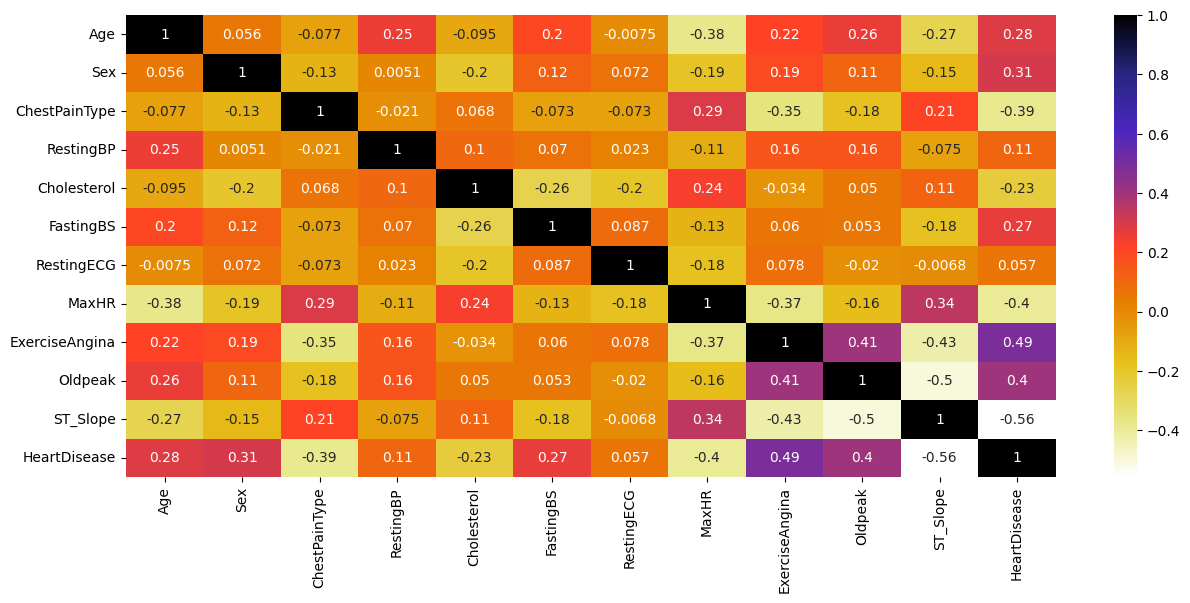

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt
#Using Pearson Correlation
plt.figure(figsize=(15,6))
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [136]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
corr_clm=correlation(df.drop('HeartDisease',axis='columns'),0.2)
corr_clm

{'Cholesterol',
 'ExerciseAngina',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'RestingBP',
 'ST_Slope'}

In [137]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(df.drop('HeartDisease',axis='columns'), df['HeartDisease'])
mutual_info = pd.Series(mutual_info)
mutual_info.index = (df.drop('HeartDisease',axis='columns')).columns
mutual_info.sort_values(ascending=False)

ST_Slope          0.213558
ChestPainType     0.163879
ExerciseAngina    0.133589
Oldpeak           0.114413
MaxHR             0.087999
Age               0.069143
Cholesterol       0.059317
Sex               0.050201
FastingBS         0.041308
RestingBP         0.024835
RestingECG        0.005766
dtype: float64

In [138]:
oned=np.array(list(corr_clm))
twod=np.array(drop_const)
print(oned)
print(twod)

['ExerciseAngina' 'ST_Slope' 'Cholesterol' 'FastingBS' 'Oldpeak'
 'RestingBP' 'MaxHR']
['Sex' 'FastingBS' 'ExerciseAngina' 'ST_Slope' 'HeartDisease']


In [139]:

# Convert 'a' and 'b' to sets for efficient intersection check
set_a = set(oned)
set_b = set(twod)

# Find the common values between 'a' and 'b'
common_values = set_a.intersection(set_b)

if common_values:
    print("Common values between 'a' and 'b':", list(common_values))
else:
    print("There are no common values between 'a' and 'b.")


Common values between 'a' and 'b': ['ExerciseAngina', 'ST_Slope', 'FastingBS']


In [140]:
list(common_values)

['ExerciseAngina', 'ST_Slope', 'FastingBS']

In [141]:
df.drop(list(common_values),inplace=True,axis='columns')


In [142]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,Oldpeak,HeartDisease
0,40,1,1,140,289,1,172,0.0,0
1,49,0,2,160,180,1,156,1.0,1
2,37,1,1,130,283,2,98,0.0,0
3,48,0,0,138,214,1,108,1.5,1
4,54,1,2,150,195,1,122,0.0,0


**OUTLIER DETECTION**

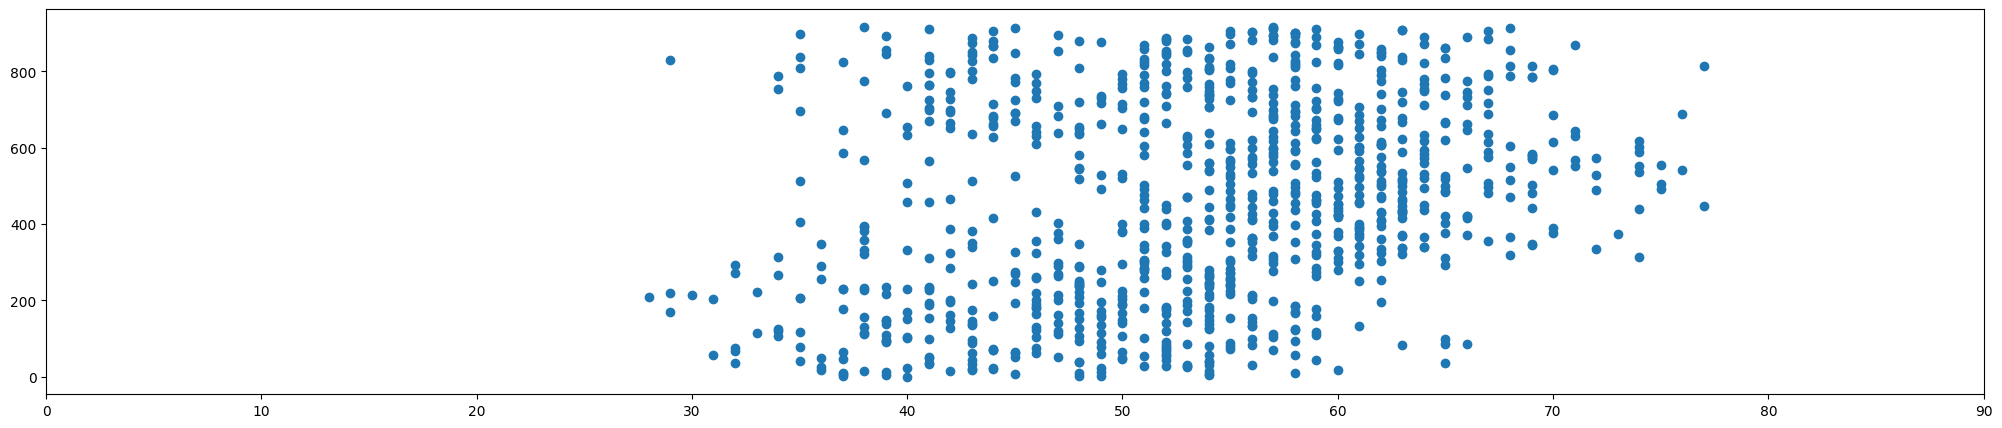

In [143]:
plt.figure(figsize=(25,5))
plt.xlim(0,90)
plt.scatter(df.Age,df.index)

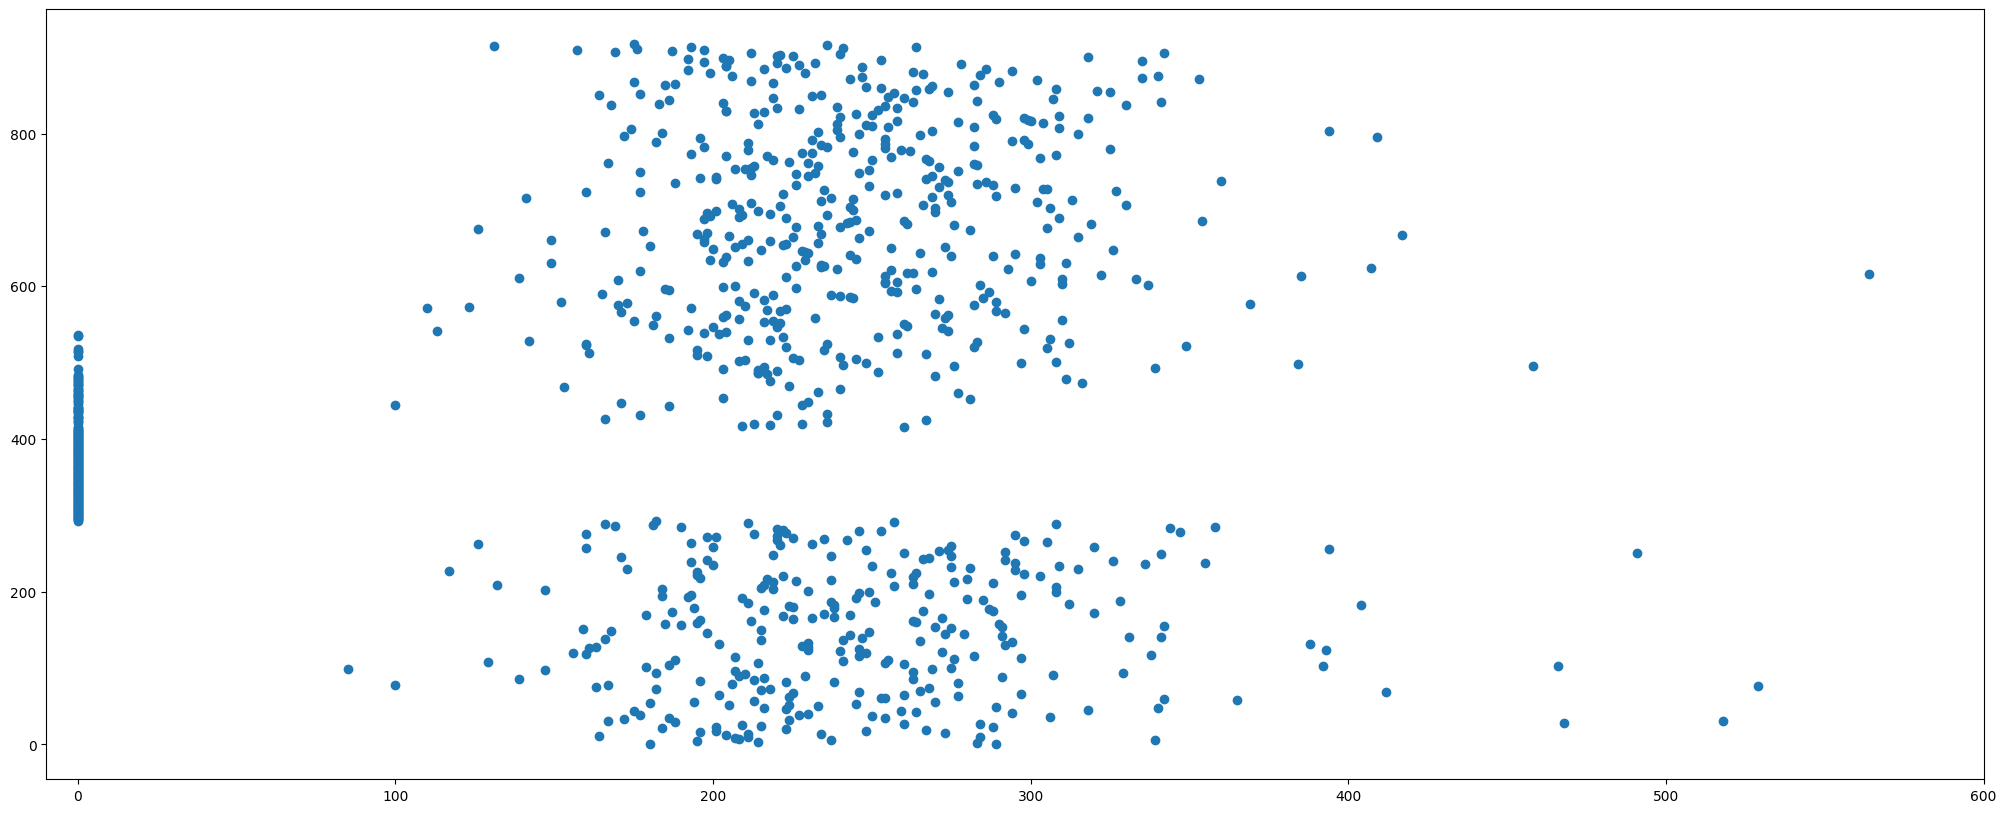

In [144]:
plt.figure(figsize=(25,10))
plt.xlim(-10,600)
plt.scatter(df.Cholesterol,df.index)

In [145]:
Q1=df.Cholesterol.quantile(0.25)
Q3=df.Cholesterol.quantile(0.75)

IQR=Q3-Q1
IQR

93.75

In [146]:
minTh=Q1-1.5*IQR
maxTh=Q3+1.5*IQR
print(maxTh,' | ',minTh)
print('Anything above and belove the thresold, revert the values')

407.625  |  32.625
Anything above and belove the thresold, revert the values


In [147]:
print('USING IQR')
df[(df.Cholesterol<maxTh )& (df.Cholesterol>minTh)] 

USING IQR


,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,Oldpeak,HeartDisease
0,40,1,1,140,289,1,172,0.0,0
1,49,0,2,160,180,1,156,1.0,1
2,37,1,1,130,283,2,98,0.0,0
3,48,0,0,138,214,1,108,1.5,1
4,54,1,2,150,195,1,122,0.0,0
...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,1,132,1.2,1
914,68,1,0,144,193,1,141,3.4,1
915,57,1,0,130,131,1,115,1.2,1
916,57,0,1,130,236,0,174,0.0,1


In [148]:
maxStd=df.Cholesterol.mean()+3*df.Cholesterol.std()
minStd=df.Cholesterol.mean()-3*df.Cholesterol.std()
print(minStd,' | ',maxStd)

-129.35286938645797  |  526.9519979267629


In [149]:
print('USING STANDARD DEVIATION')
df[(df.Cholesterol<maxStd )& (df.Cholesterol>minStd)] 

USING STANDARD DEVIATION


,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,Oldpeak,HeartDisease
0,40,1,1,140,289,1,172,0.0,0
1,49,0,2,160,180,1,156,1.0,1
2,37,1,1,130,283,2,98,0.0,0
3,48,0,0,138,214,1,108,1.5,1
4,54,1,2,150,195,1,122,0.0,0
...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,1,132,1.2,1
914,68,1,0,144,193,1,141,3.4,1
915,57,1,0,130,131,1,115,1.2,1
916,57,0,1,130,236,0,174,0.0,1


In [150]:
from scipy import stats

significance_level=0.05
threshold=stats.norm.ppf(1 - (significance_level / 2))
print(threshold)

1.959963984540054


In [151]:
df['Zscore']=(df.Cholesterol-df.Cholesterol.mean())/df.Cholesterol.std()

In [152]:
df.sample()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,Oldpeak,HeartDisease,Zscore
407,62,1,0,115,0,1,72,-0.5,1,-1.817444


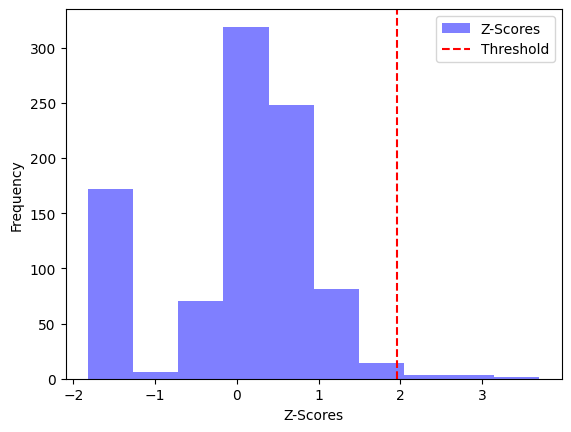

In [153]:
plt.hist(df.Zscore, bins=10, alpha=0.5, color='blue', label='Z-Scores')

# Add a vertical line at the chosen threshold
plt.axvline(x=threshold, color='red', linestyle='--', label='Threshold')

# Set labels and a legend
plt.xlabel('Z-Scores')
plt.ylabel('Frequency')
plt.legend(loc='upper right')


In [154]:
'''
HENCE OUR THRESHOLD IS LESS THAN 2 IE, 1.96
'''
threshold=1.96

In [155]:
print('USING Z SCORE')
df[(df.Zscore<threshold )& (df.Zscore>-threshold)] 

USING Z SCORE


,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,Oldpeak,HeartDisease,Zscore
0,40,1,1,140,289,1,172,0.0,0,0.824621
1,49,0,2,160,180,1,156,1.0,1,-0.171867
2,37,1,1,130,283,2,98,0.0,0,0.769768
3,48,0,0,138,214,1,108,1.5,1,0.138964
4,54,1,2,150,195,1,122,0.0,0,-0.034736
...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,1,132,1.2,1,0.596068
914,68,1,0,144,193,1,141,3.4,1,-0.053020
915,57,1,0,130,131,1,115,1.2,1,-0.619830
916,57,0,1,130,236,0,174,0.0,1,0.340090


In [162]:
print('USING STANDARD DEVIATION')
stdrange=df[(df.Cholesterol>maxStd )| (df.Cholesterol<minStd)] 
stdrange

USING STANDARD DEVIATION


,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,Oldpeak,HeartDisease,Zscore
76,32,1,0,118,529,1,130,0.0,1,3.018723
149,54,1,0,130,603,1,125,1.0,1,3.695238
616,67,0,2,115,564,0,160,1.6,0,3.338696


In [163]:
print('USING Z SCORE')
zscorerange=df[(df.Zscore>threshold )| (df.Zscore<-threshold)] 
zscorerange

USING Z SCORE


,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,Oldpeak,HeartDisease,Zscore
28,53,0,1,113,468,1,127,0.0,0,2.461055
30,53,1,2,145,518,1,130,0.0,1,2.918160
76,32,1,0,118,529,1,130,0.0,1,3.018723
103,40,1,0,120,466,1,152,1.0,1,2.442771
149,54,1,0,130,603,1,125,1.0,1,3.695238
250,44,1,0,135,491,1,135,0.0,1,2.671323
496,58,1,0,132,458,1,69,1.0,0,2.369634
616,67,0,2,115,564,0,160,1.6,0,3.338696
667,65,0,2,140,417,0,157,0.8,0,1.994809


In [196]:
(set(zscorerange.index).intersection(set(stdrange.index)))

{76, 149, 616}

In [203]:
#Outlier_Detected_df
ODdf=df.drop([76,149,616])

In [204]:
df.iloc[76]

Age               32.000000
Sex                1.000000
ChestPainType      0.000000
RestingBP        118.000000
Cholesterol      529.000000
RestingECG         1.000000
MaxHR            130.000000
Oldpeak            0.000000
HeartDisease       1.000000
Zscore             3.018723
Name: 76, dtype: float64

In [205]:
ODdf.iloc[76]

Age               35.000000
Sex                0.000000
ChestPainType      0.000000
RestingBP        140.000000
Cholesterol      167.000000
RestingECG         1.000000
MaxHR            150.000000
Oldpeak            0.000000
HeartDisease       0.000000
Zscore            -0.290715
Name: 77, dtype: float64

In [206]:
ODdf

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,Oldpeak,HeartDisease,Zscore
0,40,1,1,140,289,1,172,0.0,0,0.824621
1,49,0,2,160,180,1,156,1.0,1,-0.171867
2,37,1,1,130,283,2,98,0.0,0,0.769768
3,48,0,0,138,214,1,108,1.5,1,0.138964
4,54,1,2,150,195,1,122,0.0,0,-0.034736
...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,1,132,1.2,1,0.596068
914,68,1,0,144,193,1,141,3.4,1,-0.053020
915,57,1,0,130,131,1,115,1.2,1,-0.619830
916,57,0,1,130,236,0,174,0.0,1,0.340090


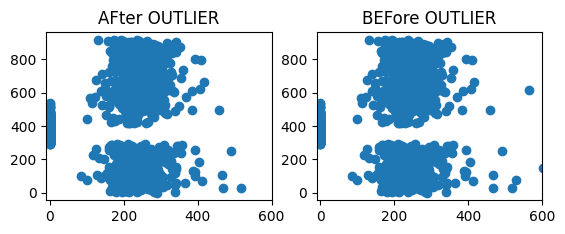

In [223]:
plt.subplot(2,2,1)
plt.title('AFter OUTLIER')
plt.xlim(-10,600)
plt.scatter(ODdf.Cholesterol,ODdf.index)
plt.subplot(2,2,2)
plt.title('BEFore OUTLIER')
plt.xlim(-10,600)
plt.scatter(df.Cholesterol,df.index)

In [224]:
ODdf.sample()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,Oldpeak,HeartDisease,Zscore
659,59,1,2,126,218,1,134,2.2,1,0.175532


In [238]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Split the dataset into a training set and a testing set (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(ODdf.drop(['Zscore','HeartDisease'],axis='columns'), ODdf.HeartDisease, test_size=0.2, random_state=1)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)


In [241]:
rf_classifier.score(X_test,y_test)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.81


In [243]:

# Evaluate the classifier's performance

# Generate a classification report for more detailed metrics
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.86      0.78        72
           1       0.90      0.78      0.84       111

    accuracy                           0.81       183
   macro avg       0.81      0.82      0.81       183
weighted avg       0.83      0.81      0.82       183



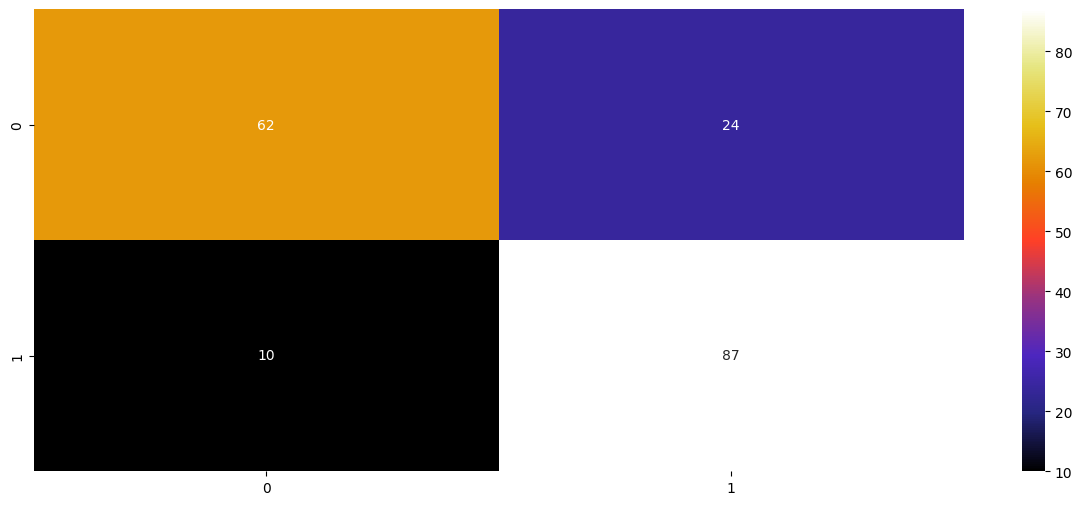

In [246]:
from sklearn.metrics import confusion_matrix
con=confusion_matrix(y_pred,y_test)
plt.figure(figsize=(15,6))
sns.heatmap(con, annot=True, cmap=plt.cm.CMRmap)
plt.show()